# Board Games Review Analysis

Reviews not only help to influence decisions of a consumer but are also an important consideration for gaining user trust. <br>
Here we will look at reviews of board games. <br>
*The dataset has been taken from: https://github.com/ThaWeatherman/scrapers.* <br>
<blockquote>BoardGameGeek (BGG) is an online forum for board gaming hobbyists and a game database that holds reviews, images and videos for over 101,000 different tabletop games, including European-style board games, wargames, and card games. In addition to the game database, the site allows users to rate games on a 1–10 scale and publishes a ranked list of board games.</blockquote> <br> 

**We will be using TWO models: LINEAR REGRESSOR and RANDOM FORESTS to predict the average review of a board game based on a number of characteristics such as playing time, average rating, number of players etc.**

# Step 1 : Importing the required libraries
**Pandas:**      For reading files, creating and iterating through dataframes and to inspect data <br>
**Matplotlib:**  Python based visualization library for plotting 2D arrays <br>
**Seaborn:**     Another Python based library for making high quality statistical graphics <br>
**sklearn:**     Machine Learning library in Python for using algorithms/models on our data for predictions

In [1]:
import sys
import pandas
import matplotlib
import seaborn
import sklearn

## Importing the specific packages
<hr>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Step 2 : Loading the dataset
After the data has been put in the current directory we can use a Pandas dataframe to load data. The advantage of using Pandas for data analysis is that it converts a Python's list, dictionary or NumPy array to a dataframe. To put it simply, it takes either of these data structures and converts them into a Python object of rows and columns called a Dataframe which can then be used for inspecting and iterating through data.


In [5]:
games = pandas.read_csv("/home/mrigank/Desktop/games.csv")

# Step 3 : Performing Exploratory Data Analysis

In [6]:
print(games.columns)
print(games.shape)

Index([u'id', u'type', u'name', u'yearpublished', u'minplayers', u'maxplayers',
       u'playingtime', u'minplaytime', u'maxplaytime', u'minage',
       u'users_rated', u'average_rating', u'bayes_average_rating',
       u'total_owners', u'total_traders', u'total_wanters', u'total_wishers',
       u'total_comments', u'total_weights', u'average_weight'],
      dtype='object')
(81312, 20)


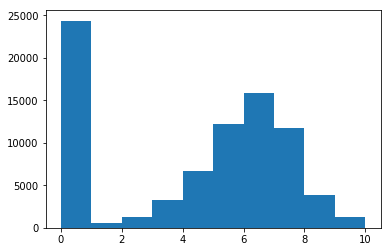

In [7]:
plt.hist(games["average_rating"])
plt.show()

In [8]:
print(games[games["average_rating"]==0].iloc[0])
print(games[games["average_rating"]>0].iloc[0])


id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

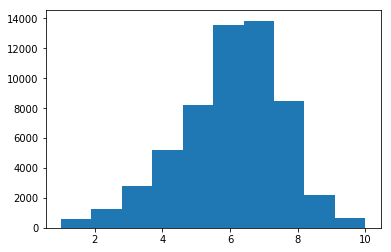

In [9]:
games = games[games["users_rated"]>0]
games = games.dropna(axis=0)
plt.hist(games["average_rating"])
plt.show()

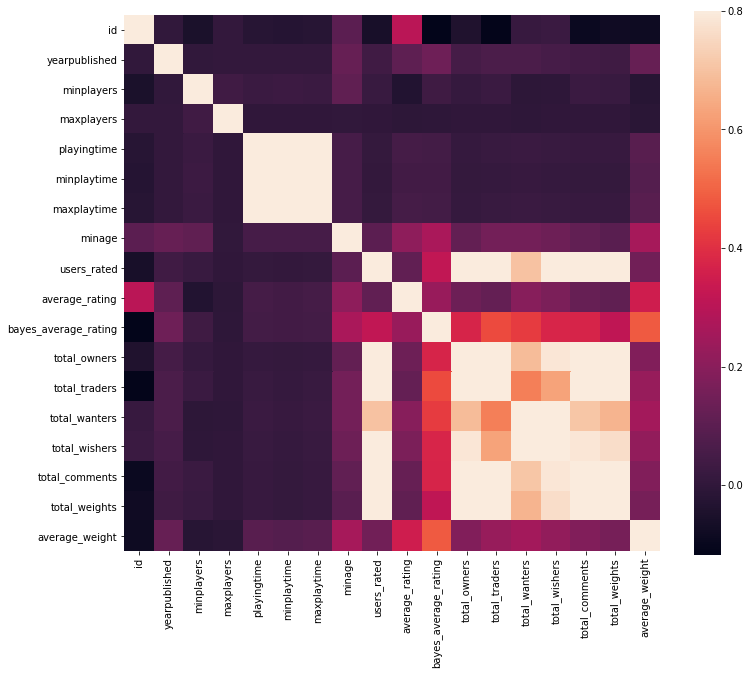

In [10]:
corrmat = games.corr()
fig = plt.figure(figsize=(12,10))
sns.heatmap(corrmat, vmax=0.8, square=True)
plt.show()

In [11]:
columns = games.columns.tolist()

columns = [c for c in columns if c not in ["bayes_average_rating","average_rating","type","name","id"]]

target = "average_rating"

In [12]:
from sklearn.model_selection import train_test_split


train = games.sample(frac = 0.8, random_state = 1)

test = games.loc[~games.index.isin(train.index)]

print(train.shape)
print (test.shape)

(45515, 20)
(11379, 20)


In [15]:
# Import Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Initializing our model class
LR = LinearRegression()
# Fit the model into the training data
LR.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
# Generate predictions for the test set
predictions =  LR.predict(test[columns])
# Compute the error between test predictions and the actual values
mean_squared_error(predictions, test[target])

2.078819032629324

In [17]:
# Import Random Forests Model
from sklearn.ensemble import RandomForestRegressor
# Initializing the model
RFR = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, random_state = 1)
# Fit the model into to data
RFR.fit(train[columns], train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [18]:
# Generate predictions for the test set
predictions =  RFR.predict(test[columns])
# Compute the error between test predictions and the actual values
mean_squared_error(predictions, test[target])

1.4458560046071653

In [19]:
test[columns].iloc[0]

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [21]:
# Making predictions with both the models
rating_LR = LR.predict(test[columns].iloc[0].values.reshape(1,-1))
rating_RFR = RFR.predict(test[columns].iloc[0].values.reshape(1,-1))
# Print the results
print(rating_LR)
print(rating_RFR)

[8.12061283]
[7.91373581]


In [23]:
test[target].iloc[0]

8.07933